# Classificação de textos com spaCy

# Etapa 1: Importação e instalação das bibliotecas

In [1]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [2]:
spacy.__version__

'2.2.3'

# Etapa 2: Carregamento da base de dados

In [3]:
df_train = pd.read_csv('base_treinamento.txt', encoding='utf-8')
df_train.shape

(196, 2)

In [4]:
df_train.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [5]:
df_train.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


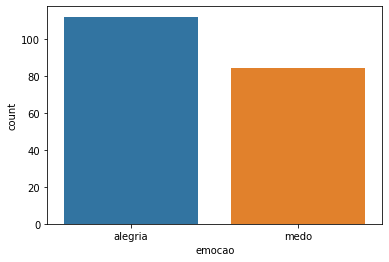

In [6]:
sns.countplot(x= 'emocao', data= df_train, label='Contagem');

# Etapa 3: Função para pré-processamento dos textos

In [7]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS
print(stop_words)

{'ao', 'esteve', 'grandes', 'nenhuma', 'devem', 'apontar', 'mas', 'não', 'na', 'tivemos', 'de', 'fez', 'dezasseis', 'quinze', 'dos', 'custa', 'tentar', 'local', 'nesta', 'fazeis', 'nas', 'grupo', 'quarto', 'vem', 'quatro', 'ser', 'maioria', 'alguns', 'grande', 'pelos', 'novos', 'caminho', 'estes', 'com', 'sou', 'perto', 'sim', 'da', 'as', 'conhecido', 'como', 'estive', 'novo', 'conselho', 'valor', 'estivestes', 'sob', 'estiveram', 'vinte', 'foste', 'me', 'dizer', 'pois', 'põem', 'sois', 'seu', 'próprio', 'fará', 'fora', 'vais', 'neste', 'estar', 'vai', 'está', 'meus', 'muitos', 'porquê', 'desde', 'esses', 'teve', 'só', 'após', 'faz', 'ademais', 'sei', 'bem', 'tiveram', 'aquele', 'pelas', 'mesmo', 'nada', 'talvez', 'quarta', 'esse', 'os', 'quê', 'vão', 'dar', 'atrás', 'ontem', 'ambas', 'qual', 'desse', 'sua', 'assim', 'duas', 'tentei', 'oito', 'outros', 'iniciar', 'ela', 'tendes', 'fazes', 'em', 'estão', 'tipo', 'maior', 'possível', 'eu', 'muito', 'vós', 'ali', 'tens', 'todo', 'fostes',

In [9]:
len(stop_words)

413

In [10]:
pln = spacy.load('pt')
pln

In [11]:
def preprocess(texto:str)->tuple:
        
    documento = pln(texto.lower())
    #lst_token = []
    lst_lemma = []
    
    for token in documento:
        #lst_token.append(token.text)
        lst_lemma.append(token.lemma_)
        
    lst_lemma = [word for word in lst_lemma if word not in stop_words and word not in pontuacoes]
    txt_clean = ' '.join([str(el) for el in lst_lemma if not el.isdigit()])
        
    return txt_clean

In [12]:
txt_clean = preprocess('Estou aprendendo processamento de linguagem natural, curso Curitiba')
txt_clean

'aprender processamento linguagem natural cursar curitiba'

# Etapa 4: Pré-processamento da base de dados

## Limpeza dos textos

In [13]:
df_train.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [14]:
df_train['texto'] = df_train['texto'].apply(preprocess)

In [15]:
df_train.head()

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão o o cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria


## Tratamento da classe

In [16]:
exemplo_data = [['este trabalho é agradável',{'ALEGRIA':True, 'MEDO':False}],
                 ['este lugar continua assustador',{'ALEGRIA':False,'MEDO':True}]]

In [17]:
type(exemplo_data)

list

In [18]:
exemplo_data[0][0]

'este trabalho é agradável'

In [19]:
exemplo_data[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [20]:
type(exemplo_data[0][1])

dict

In [21]:
X_train = []

for texto, emocao in zip(df_train['texto'], df_train['emocao']):
    #print(texto, emocao)
    dct_classe = ({'ALEGRIA':emocao=='alegria', 'MEDO':emocao=='medo'})
    
    X_train.append([texto, dct_classe.copy()])

In [22]:
len(X_train)

196

In [23]:
X_train[0]

['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}]

In [24]:
X_train[0][0]

'trabalhar agradável'

In [25]:
X_train[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [26]:
type(X_train[0][1])

dict

In [27]:
X_train

[['trabalhar agradável', {'ALEGRIA': True, 'MEDO': False}],
 ['gostar ficar o aconchegar', {'ALEGRIA': True, 'MEDO': False}],
 ['o adesão o o cursar hoje', {'ALEGRIA': True, 'MEDO': False}],
 ['admirar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar comer', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar cabelar maciar', {'ALEGRIA': True, 'MEDO': False}],
 ['adorar o cor olho', {'ALEGRIA': True, 'MEDO': False}],
 ['somar amável o outro', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir umar afeição', {'ALEGRIA': True, 'MEDO': False}],
 ['querer agradar filho', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir completamente amar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar', {'ALEGRIA': True, 'MEDO': False}],
 ['alívio', {'ALEGRIA': True, 'MEDO': False}],
 ['o dor amenizar finalmente', {'ALEGRIA': True, 'MEDO': False}],
 ['achar apaixonar', {'ALEGRIA': True, 'MEDO': False}],
 ['amar maravilhoso', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir animar', {'ALEGRIA': True, 'MEDO': False}],
 ['sentir hoje'

# Etapa 5: Criação do classificador

In [28]:
model = spacy.blank('pt')
classes = model.create_pipe('textcat')
classes.add_label('ALEGRIA')
classes.add_label('MEDO')
model.add_pipe(classes)
historico = []

In [30]:
model.begin_training()
for epoca in range(1000):
    
    random.shuffle(X_train)
    losses = {}
    
    for batch in spacy.util.minibatch(X_train, 30):
        
        textos = [model(texto) for texto, entities in batch]
        annotations = [{'cats':entities} for texto, entities in batch]
        model.update(textos, annotations, losses=losses)
        
    if epoca % 100 == 0:
        print(losses)
        historico.append(losses)

{'textcat': 0.007494556717574596}
{'textcat': 4.2293748947486165e-08}
{'textcat': 1.692116646800912e-08}
{'textcat': 8.8148668364596e-09}
{'textcat': 5.270586578287606e-09}
{'textcat': 3.61695151607222e-09}
{'textcat': 2.503561163935686e-09}
{'textcat': 2.484618122355897e-09}
{'textcat': 2.3682050209750116e-09}
{'textcat': 1.7763680387750114e-09}


In [31]:
historico_loss = []
for i in historico:
    historico_loss.append(i.get('textcat'))

In [32]:
historico_loss = np.array(historico_loss)
historico_loss

array([7.49455672e-03, 4.22937489e-08, 1.69211665e-08, 8.81486684e-09,
       5.27058658e-09, 3.61695152e-09, 2.50356116e-09, 2.48461812e-09,
       2.36820502e-09, 1.77636804e-09])

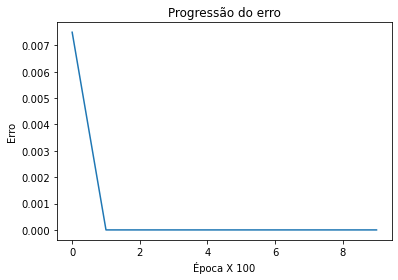

In [41]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Época X 100')
plt.ylabel('Erro')
plt.show()

In [42]:
model.to_disk('model')

# Etapa 6: Testes com uma frase

In [43]:
model_loaded = spacy.load('model')
model_loaded

In [44]:
texto_positivo = 'eu adoro cor dos seus olhos'

In [45]:
texto_positivo = preprocess(texto_positivo)
texto_positivo

'adorar cor olho'

In [46]:
previsao = model_loaded(texto_positivo)
previsao

adorar cor olho

In [47]:
previsao.cats

{'ALEGRIA': 0.9987204074859619, 'MEDO': 0.001031639170832932}

In [58]:
texto_negativo = 'estou com medo dele'
previsao = model_loaded(preprocess(texto_negativo))
previsao.cats

{'ALEGRIA': 4.539787187241018e-05, 'MEDO': 0.9999545812606812}

# Etapa 7: Avaliação do modelo

## Avaliação na base de treinamento

In [52]:
previsoes = []
for texto in df_train['texto']:
    #print(texto)
    previsao = model_loaded(texto)
    previsoes.append(previsao.cats)

In [53]:
previsoes

[{'ALEGRIA': 0.9998890161514282, 'MEDO': 0.0001500900834798813},
 {'ALEGRIA': 0.9990379810333252, 'MEDO': 0.00035855674650520086},
 {'ALEGRIA': 0.9995318651199341, 'MEDO': 0.00013110654253978282},
 {'ALEGRIA': 0.999555766582489, 'MEDO': 0.00017830223077908158},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.9999358654022217, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.999687910079956, 'MEDO': 0.0004016688035335392},
 {'ALEGRIA': 0.9998832941055298, 'MEDO': 0.00011560926213860512},
 {'ALEGRIA': 0.9997079968452454, 'MEDO': 0.00011097143578808755},
 {'ALEGRIA': 0.9997020363807678, 'MEDO': 0.00023574597435072064},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.9999308586120605, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.999815046787262, 'MEDO': 6.567717355210334e-05},
 {'ALEGRIA': 0.9999545812606812, 'MEDO': 4.539787187241018e-05},
 {'ALEGRIA': 0.9993686079978943, 'MEDO': 0.00026534791686572134},
 {'ALEGRIA': 0.999952

In [54]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
        
previsoes_final = np.array(previsoes_final)

In [55]:
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [56]:
respostas_reais = df_train['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

1.0

In [60]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]], dtype=int64)

## Avaliação na base de teste

In [61]:
df_test = pd.read_csv('base_teste.txt', encoding='utf-8')
df_test.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [62]:
df_test['texto']=df_test['texto'].apply(preprocess)
df_test.head()

,texto,emocao
0,precisar pagar o ingressar,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar o suar,alegria
3,afortunar,alegria
4,benéfico parir medir,alegria


In [63]:
previsoes = []
for texto in df_test['texto']:
    #print(texto)
    previsao = model_loaded(texto)
    previsoes.append(previsao.cats)

In [64]:
previsoes_final = []
for previsao in previsoes:
    if previsao['ALEGRIA'] > previsao['MEDO']:
        previsoes_final.append('alegria')
    else:
        previsoes_final.append('medo')
        
previsoes_final = np.array(previsoes_final)

In [65]:
respostas_reais = df_test['emocao'].values

In [66]:
accuracy_score(respostas_reais, previsoes_final)

0.5

In [67]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[33, 15],
       [27,  9]], dtype=int64)